In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stocks-history/TSLA.csv


In [3]:
data=pd.read_csv('../input/tesla-stocks-history/TSLA.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2.813000e+03
mean,98.307804,100.386953,96.069256,98.349877,98.349877,3.160441e+07
std,176.108180,179.847860,171.937613,176.160413,176.160413,2.857384e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,8.838000,9.228000,8.782000,9.090000,9.090000,1.232800e+07
50%,45.720001,46.307999,44.908001,45.664001,45.664001,2.513300e+07
75%,63.998001,65.334000,63.014000,64.269997,64.269997,4.050650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2813 non-null   object 
 1   Open       2813 non-null   float64
 2   High       2813 non-null   float64
 3   Low        2813 non-null   float64
 4   Close      2813 non-null   float64
 5   Adj Close  2813 non-null   float64
 6   Volume     2813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 154.0+ KB


In [19]:
corr1=data.corr()
corr1

,Open,High,Low,Close,Volume
Open,1.000000,0.999740,0.999666,0.999371,0.174808
High,0.999740,1.000000,0.999594,0.999751,0.179915
Low,0.999666,0.999594,1.000000,0.999654,0.169714
Close,0.999371,0.999751,0.999654,1.000000,0.175873
Volume,0.174808,0.179915,0.169714,0.175873,1.000000


In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing values

In [10]:
data=data.drop(columns=['Adj Close'])

In [11]:
data

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...,...
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,13083100
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,12645600
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,13214300
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,13762100


visualization

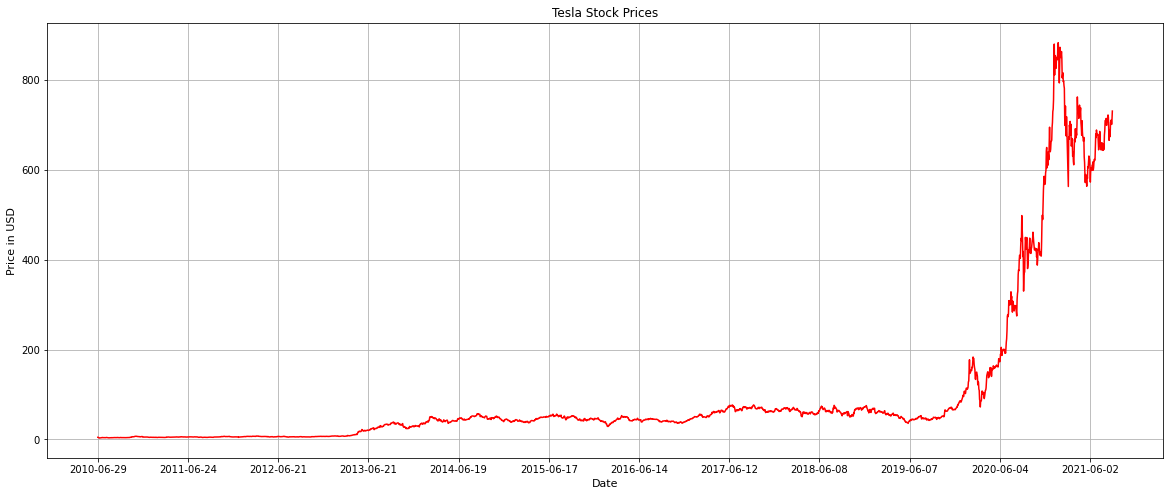

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Tesla Stock Prices')
plt.grid()
plt.show()

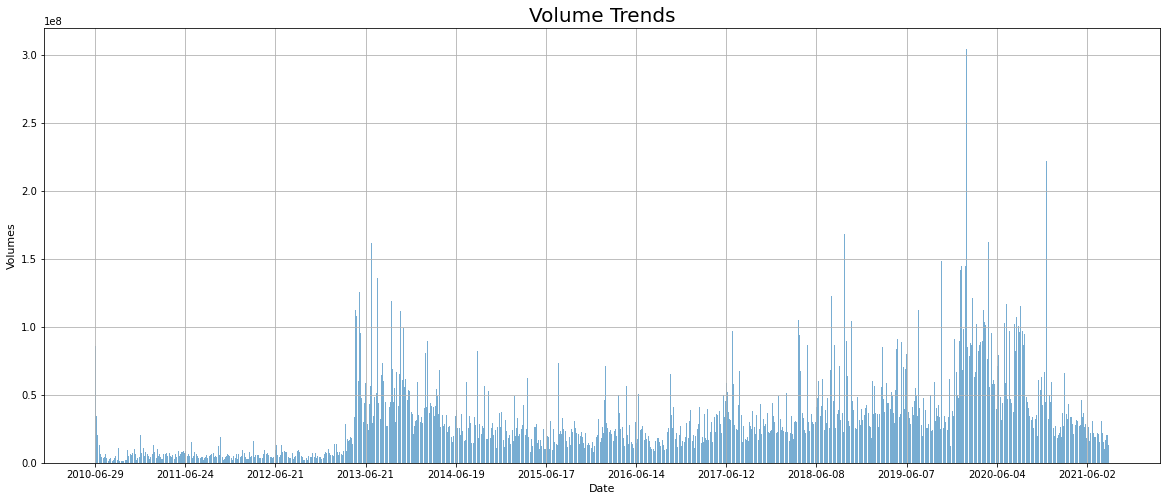

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Volume'], alpha=0.6)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
#ax.set_yscale('log')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()


In [26]:
data['vol'] = (data['Close']/data['Close'].shift(1)) - 1

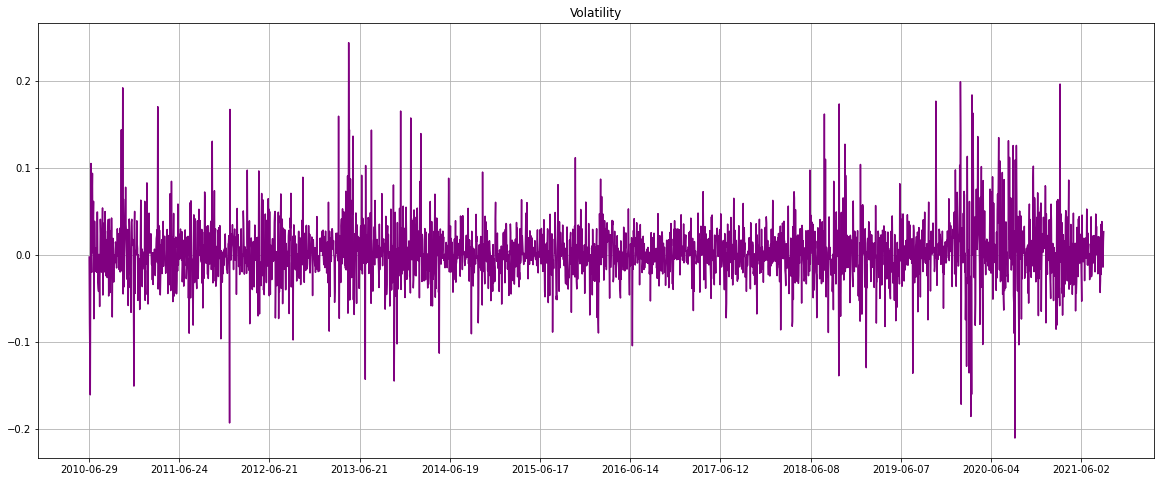

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

In [28]:
data['Market Cap'] = data['Open']*data['Volume']

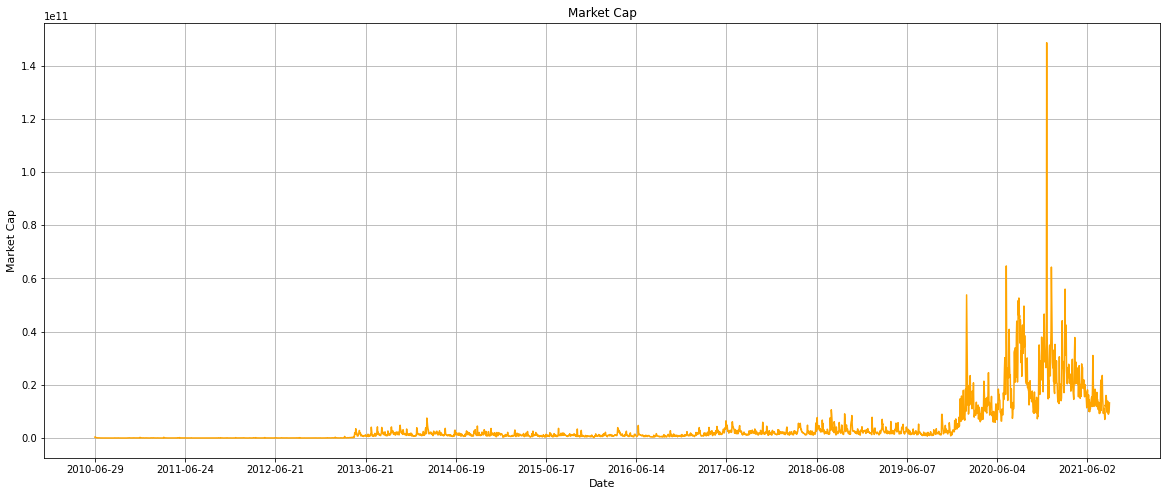

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()